## Importing Libraries

In [42]:
import pandas as pd
import numpy as np
import cufflinks as cf  # Cufflinks is used to show the plotly plot in the Jupyter notebook
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# To show the plotly plot in the Jupyter notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots

# Initialize plotly notebook mode
init_notebook_mode(connected=True)
cf.go_offline()
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

## Loading Dataset

In [18]:
df=pd.read_csv('/content/sample_data/Zomato_Dataset/zomato.csv',encoding='latin-1')
# Used Latin-1 encoding to avoid unicode error
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

- 9 NULL value in cuisines column
- All the columns are having proper data types

In [20]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


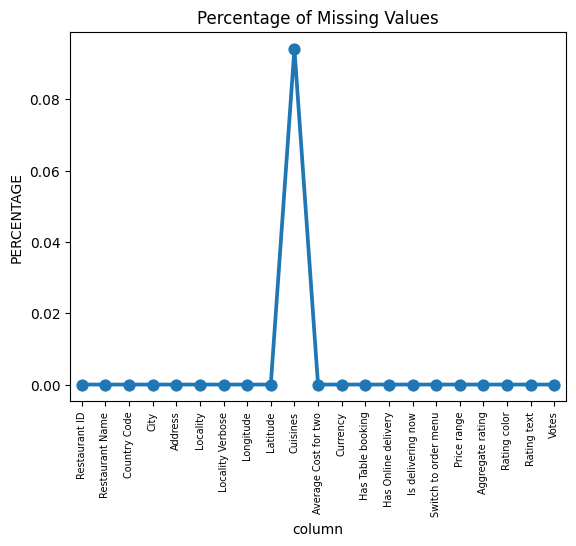

In [21]:
missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()
missing.columns = ['column', 'percentage']

# Plot the missing values
ax = sns.pointplot(x='column', y='percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.show()

Missing percentage is less than 1%
So it's safe to ignore it

In [22]:
df_c=pd.read_excel('/content/sample_data/Zomato_Dataset/Country-Code.xlsx')
df_c.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [25]:
ndf=pd.merge(df,df_c,on='Country Code',how='left')
ndf.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


## Unique Countries

In [26]:
ndf['Country'].value_counts()

,count
Country,
India,8652
United States,434
United Kingdom,80
Brazil,60
UAE,60
South Africa,60
New Zealand,40
Turkey,34
Australia,24


Null Datasets

In [30]:
nandf = ndf[ndf['Cuisines'].isnull()]
nandf

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,...,No,No,No,No,1,3.4,Orange,Average,34,United States
87,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,...,No,No,No,No,1,3.4,Orange,Average,36,United States
94,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,...,No,No,No,No,1,3.9,Yellow,Good,160,United States
297,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,...,No,No,No,No,3,3.9,Yellow,Good,209,United States
328,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,...,No,No,No,No,3,3.8,Yellow,Good,102,United States
346,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,...,No,No,No,No,1,3.4,Orange,Average,11,United States
368,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,...,No,No,No,No,3,4.4,Green,Very Good,1158,United States
418,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,...,No,No,No,No,1,4.7,Dark Green,Excellent,707,United States
455,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,...,No,No,No,No,1,3.9,Yellow,Good,309,United States




- No cuisine information for 9 out of 434 US restaurants
 ie approximately 2% of the data

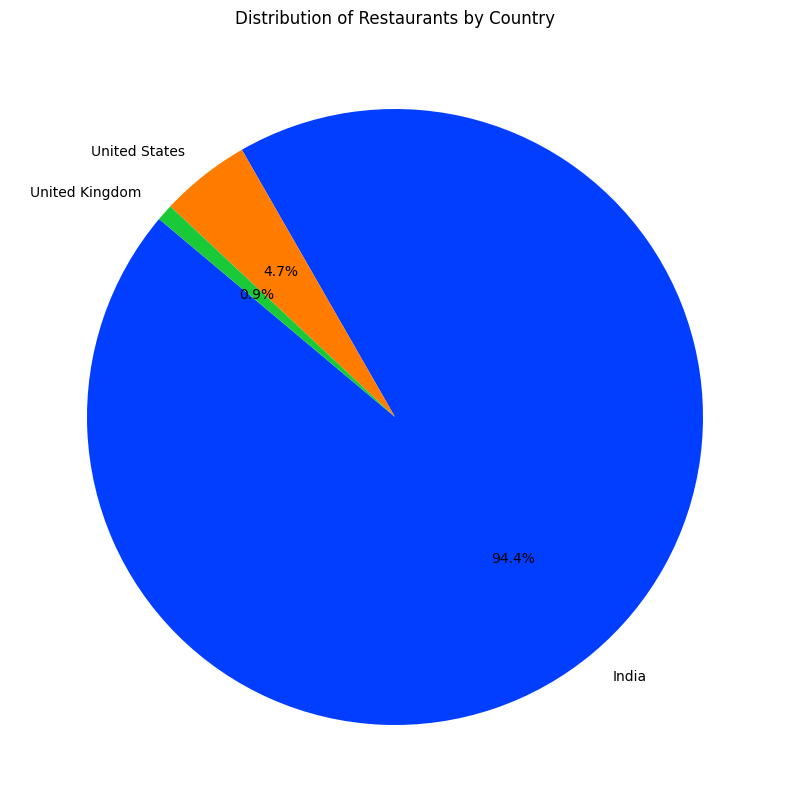

In [37]:
ncountry = ndf['Country'].value_counts().index
values = ndf['Country'].value_counts().values

# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(values[:3], labels=ncountry[:3], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('bright'))
plt.title('Distribution of Restaurants by Country')
plt.show()

## Top 3 Countries where Zomato works
- India
- USA
- UK

## Removin NULL Value

In [38]:
ndf.dropna(subset=['Cuisines'], inplace=True, axis=0)
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

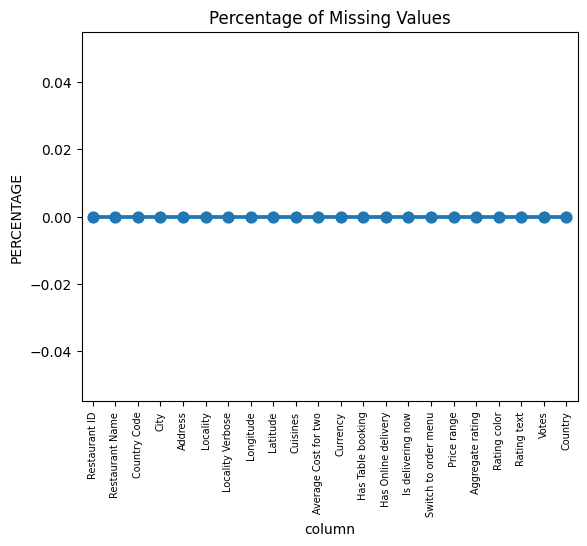

In [39]:
missing = pd.DataFrame((ndf.isnull().sum()) * 100 / ndf.shape[0]).reset_index()
missing.columns = ['column', 'percentage']

# Plot the missing values
ax = sns.pointplot(x='column', y='percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.show()

In [40]:
ratings=ndf.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


- When Rating is between 4.5 to 4.9---> Excellent
- When Rating are between 4.0 to 3.4--->very good
- When Rating is between 3.5 to 3.9----> good
- When Rating is between 3.0 to 3.4----> average
- When Rating is between 2.5 to 2.9----> average
- When Rating is between 2.0 to 2.4----> Poor

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

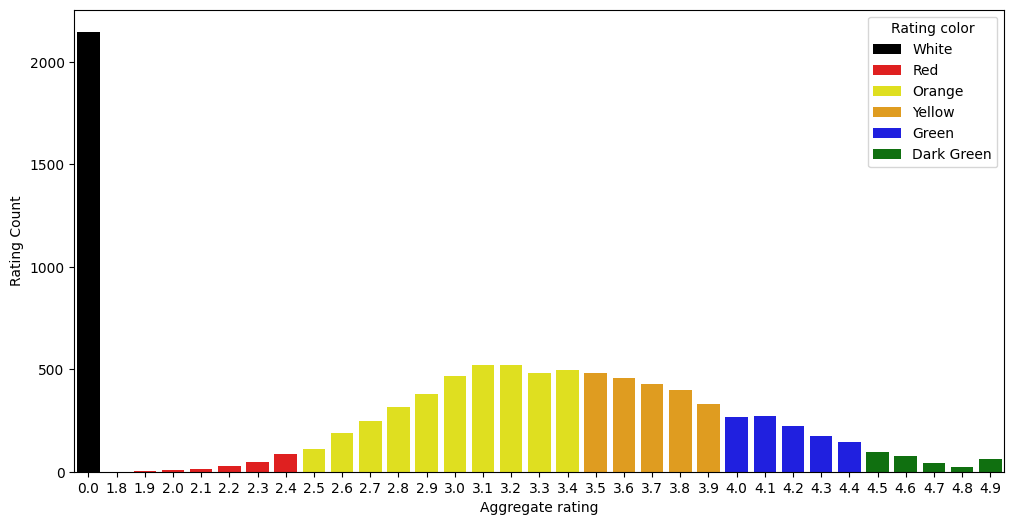

In [46]:
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x='Aggregate rating', y='Rating Count', data=ratings, hue='Rating color', palette=['black','red', 'yellow','orange','blue','green'])

<ipython-input-47-685a543600c8>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Rating color', ylabel='count'>

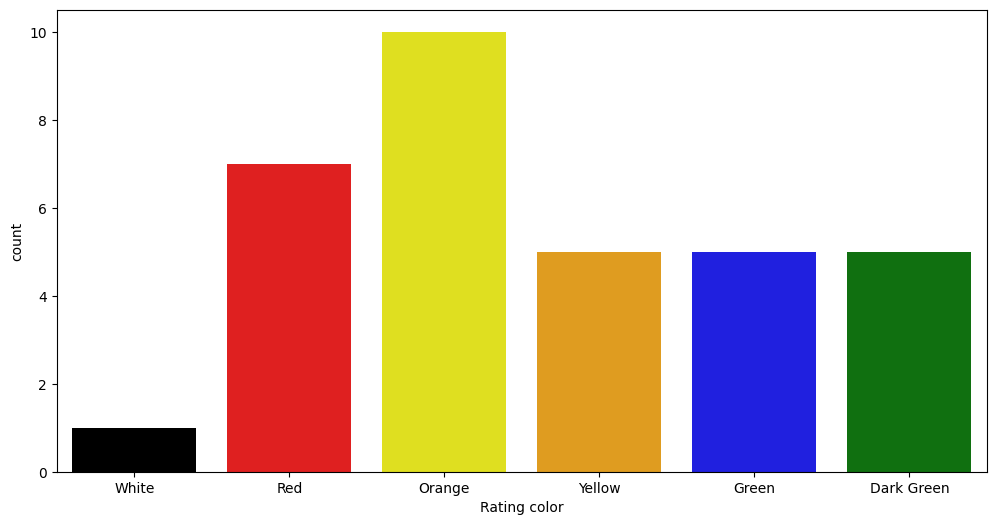

In [47]:
sns.countplot(x='Rating color', data=ratings, palette=['black','red', 'yellow','orange','blue','green'])

Analysis on 0 ratings

In [48]:
ndf[ndf['Aggregate rating']==0].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


India has most unrated restaurants

In [49]:
ndf.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

Countries where Zomato delivers

In [50]:
ndf[ndf['Has Online delivery']=='Yes'].Country.value_counts()

,count
Country,
India,2423
UAE,28


Only India And UAE has online delivery Options

In [57]:
grouped = ndf.groupby(['Has Online delivery', 'Country']).size().reset_index(name='Count')
grouped

,Has Online delivery,Country,Count
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


- In India 2423 out of 8652 food points provides online delivery ie 28%
- In UAE 28 out of 32 food points provides online dielivery ie  87.5%

Analisies on cities

In [65]:
unique_cities_per_country = ndf.groupby('Country')['City'].nunique().reset_index(name='Unique Cities')

print(unique_cities_per_country)

           Country  Unique Cities
0        Australia             23
1           Brazil              3
2           Canada              4
3            India             43
4        Indonesia              4
5      New Zealand              2
6      Phillipines              9
7            Qatar              1
8        Singapore              1
9     South Africa              6
10       Sri Lanka              1
11          Turkey              2
12             UAE              3
13  United Kingdom              4
14   United States             34


In [63]:
ncity = ndf['City'].value_counts()
ncity

,count
City,
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251
Ghaziabad,25
...,...
Lincoln,1
Lakeview,1
Lakes Entrance,1


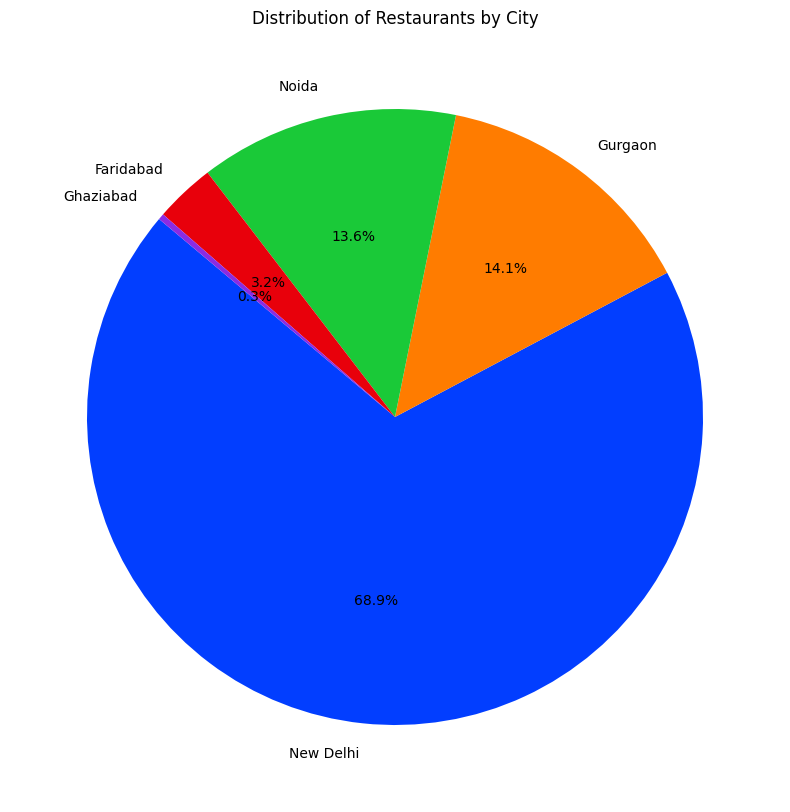

In [64]:
ncity = ndf['City'].value_counts().index
values = ndf['City'].value_counts().values

# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(values[:5], labels=ncity[:5], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('bright'))
plt.title('Distribution of Restaurants by City')
plt.show()

Analysis on Cuisines

In [66]:
ndf['ex_Cuisines'] = ndf['Cuisines'].str.split(', ')

# Explode the 'Cuisines' column to have one cuisine per row
ndf_exploded = ndf.explode('ex_Cuisines')

# Group by 'Cuisines' and count the occurrences
cuisine_counts = ndf_exploded['ex_Cuisines'].value_counts().reset_index()
cuisine_counts.columns = ['ex_Cuisine', 'Count']

print(cuisine_counts)

         ex_Cuisine  Count
0      North Indian   3960
1           Chinese   2735
2         Fast Food   1986
3           Mughlai    995
4           Italian    764
..              ...    ...
140  Fish and Chips      1
141         Malwani      1
142  Cuisine Varies      1
143       Soul Food      1
144          Bí_rek      1

[145 rows x 2 columns]


In [67]:
cuisine_counts.head(10)

,ex_Cuisine,Count
0,North Indian,3960
1,Chinese,2735
2,Fast Food,1986
3,Mughlai,995
4,Italian,764
5,Bakery,745
6,Continental,736
7,Cafe,703
8,Desserts,653
9,South Indian,636


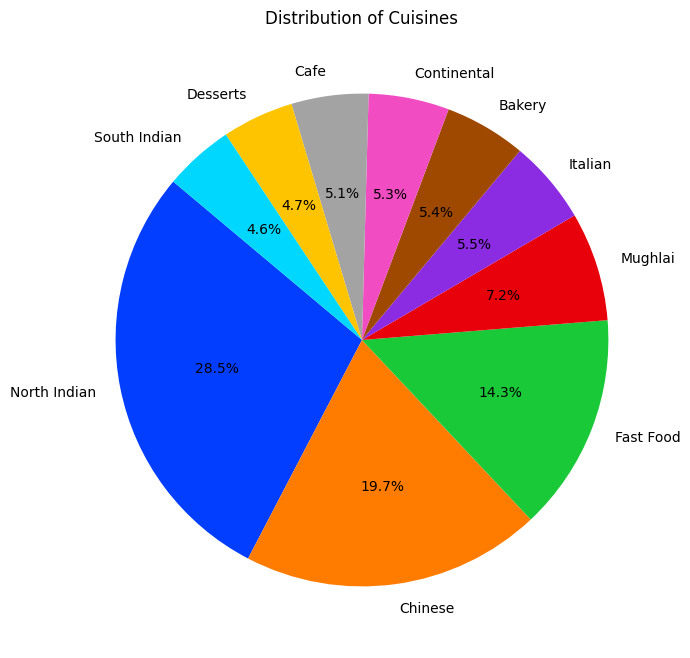

In [69]:
plt.figure(figsize=(10, 8))
plt.pie(cuisine_counts['Count'][:10], labels=cuisine_counts['ex_Cuisine'][:10], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('bright'))
plt.title('Distribution of Cuisines')
plt.show()

In [70]:
# !pip install geopandas matplotlib

In [71]:
import geopandas as gpd
from shapely.geometry import Point

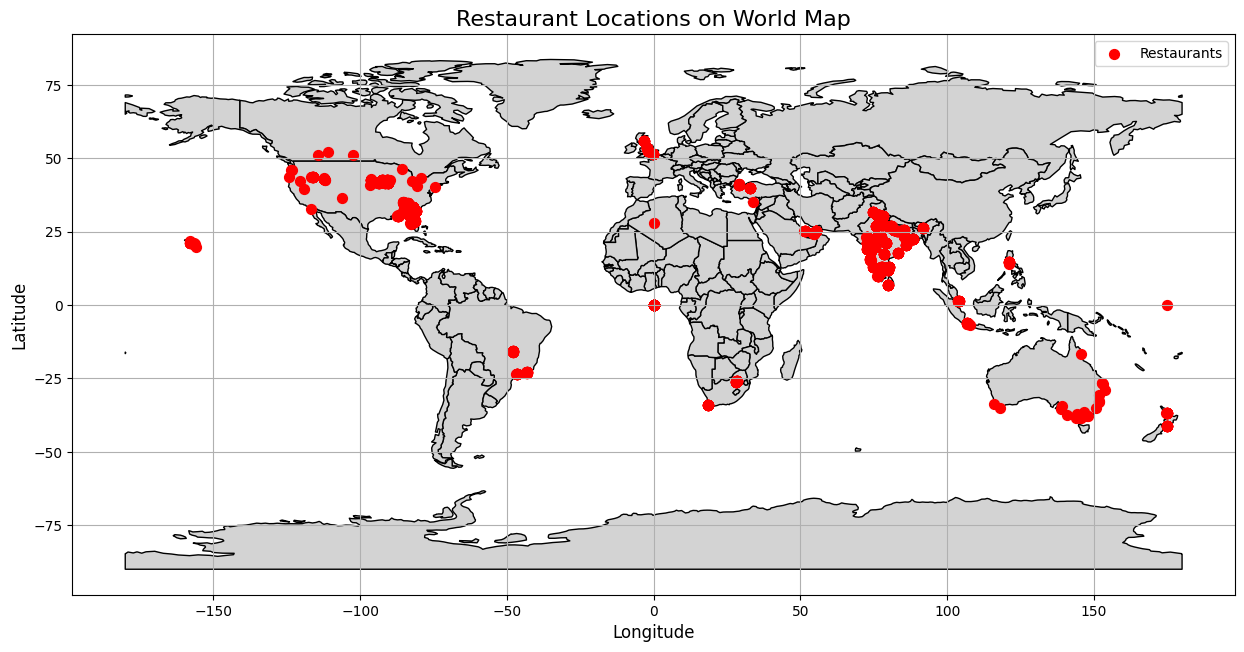

In [74]:
# Create GeoDataFrame from DataFrame
geometry = [Point(xy) for xy in zip(ndf['Longitude'], ndf['Latitude'])]
gdf = gpd.GeoDataFrame(ndf, geometry=geometry)

# Load the world map from downloaded data
world = gpd.read_file("/content/sample_data/ne_110m_admin_0_countries.shp")
# Plot the data
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey', edgecolor='black')  # Plot the world map

# Plot restaurant locations
gdf.plot(ax=ax, markersize=50, color='red', marker='o', label='Restaurants')

# Enhance the visualization
plt.title('Restaurant Locations on World Map', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()